In [1]:
import tensorflow as tf

In [2]:
tf.keras.__version__

'2.12.0'

In [3]:
tf.config.list_physical_devices('GPU')  # To Check Is there any GPU OR NOT 

[]

In [4]:
# Simple Classifier Using KERAS sequential API 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

In [5]:
# General Data : Handwritten Dataset  (HELLO WORLD FOR ANN)

In [6]:
# Load the data 
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_train_full.shape

(60000,)

In [10]:
y_test.shape

(10000,)

In [11]:
# x_train = tf.keras.utils.normalize(X_train,axis=1)
# x_test = tf.keras.utils.normalize(X_train,axis=1)

X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

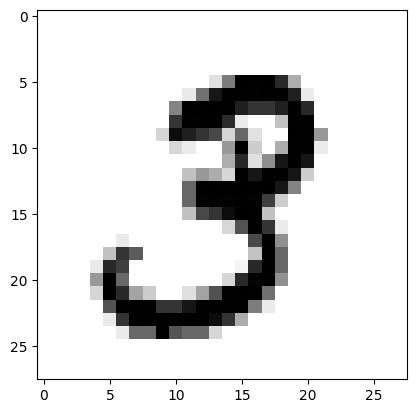

In [12]:
plt.imshow(X_train[1],cmap =plt.cm.binary)
plt.show()

<Axes: >

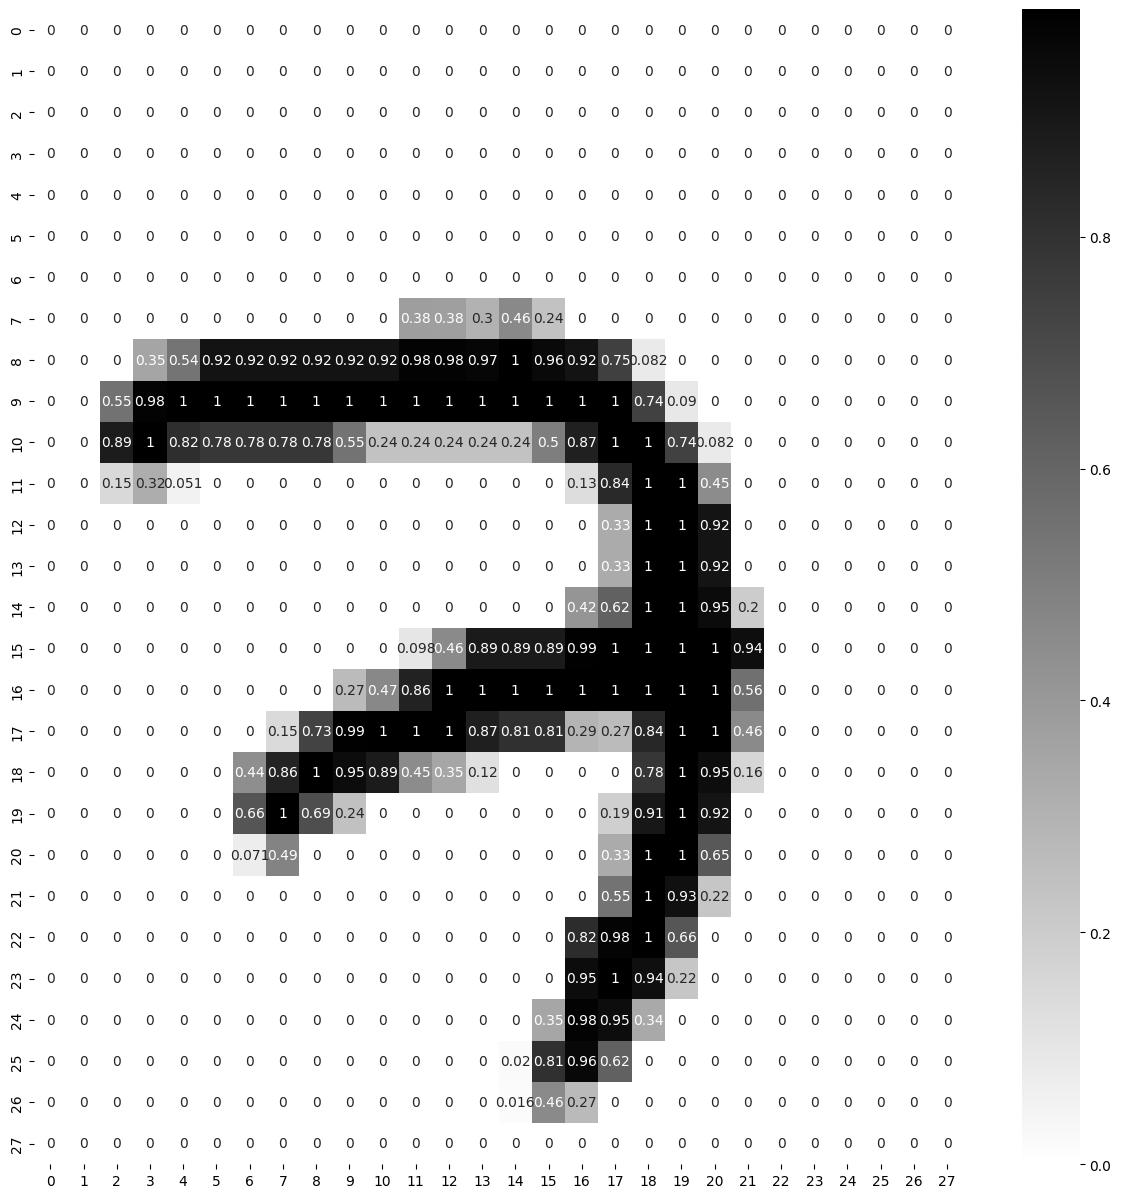

In [13]:
import seaborn as sns 
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap="binary")


In [14]:
# Input - Flatten first
# Hidden - Summation, Activation(RELU...ETC)
# Hidden - Summation, Activation(RELU...ETC)
# O/P Layer - 
#  -- Out come 

# --- Full Connected Layers

In [15]:
# SEQUENTIAL Layer 

LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]


In [16]:
model = tf.keras.models.Sequential(LAYERS)
model.layers

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
sum([784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10])  

266610

In [19]:
hidden1 = model.layers[1]
model.get_layer(hidden1.name)

In [20]:
weight,bias = hidden1.get_weights() # Get Weight and Bias 
weight,weight.shape

(array([[ 0.04831813,  0.03303253,  0.01266919, ..., -0.03161604,
         -0.0009969 , -0.00118418],
        [-0.04016439,  0.02458287,  0.02746317, ...,  0.05024631,
         -0.05796897,  0.03823916],
        [-0.03515572,  0.03846124, -0.01517168, ..., -0.03323531,
         -0.02068757,  0.05989496],
        ...,
        [-0.0216883 , -0.04380104, -0.00480629, ..., -0.04977252,
         -0.03114079,  0.0134197 ],
        [ 0.00726821, -0.07124785,  0.06411448, ...,  0.05644222,
         -0.02235459,  0.04501188],
        [-0.00500222, -0.04136104, -0.06680942, ..., -0.02937523,
         -0.00934308, -0.07141471]], dtype=float32),
 (784, 300))

In [21]:
bias,bias.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [22]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS  = ["accuracy"]

# APPLY  LOSS FUNCTION ,OPTIMIZER , METRICS
model.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)


In [23]:
EPOCHS = 30 
VALIDATION_SET = (X_valid, y_valid)

# 60000 / 32 ,BATCH SIZE = WE CAN ADJUST    TRADE OFF 
history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6078 - accuracy: 0.8446 - val_loss: 0.3041 - val_accuracy: 0.9176
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2823 - accuracy: 0.9199 - val_loss: 0.2340 - val_accuracy: 0.9362
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2302 - accuracy: 0.9334 - val_loss: 0.1993 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1972 - accuracy: 0.9434 - val_loss: 0.1796 - val_accuracy: 0.9510
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1727 - accuracy: 0.9507 - val_loss: 0.1604 - val_accuracy: 0.9574
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1535 - accuracy: 0.9567 - val_loss: 0.1481 - val_accuracy: 0.9594
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1385 - accuracy: 0.9601 - val_loss: 0.1372 - val_accuracy:

In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0729 - accuracy: 0.9780


[0.07289344817399979, 0.9779999852180481]

In [26]:
model.save('model.h5')

In [27]:
loaded_model = tf.keras.models.load_model('model.h5')

In [28]:
loaded_model

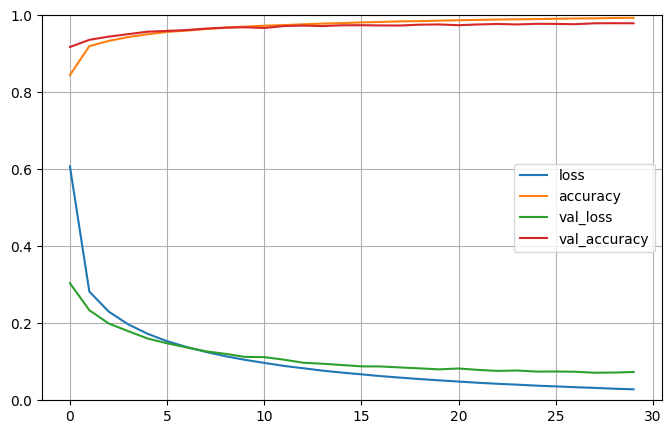

In [29]:
df = pd.DataFrame(history.history)
df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
new_data = X_test[:3]
actual_data = y_test[:3]
y_pred = model.predict(new_data)

1/1 [==============================] - 0s 78ms/step


In [31]:
y_pred.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
y_pred = np.argmax(y_pred,axis=-1) # Find Max 

y_pred,actual_data

(array([7, 2, 1], dtype=int64), array([7, 2, 1], dtype=uint8))

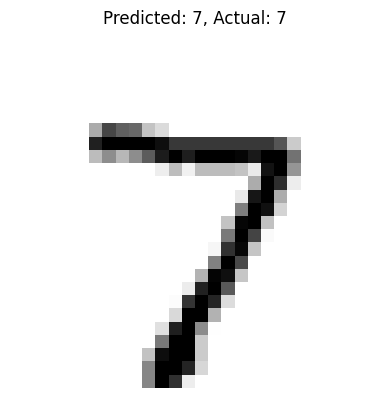

------------------------------------------------------------


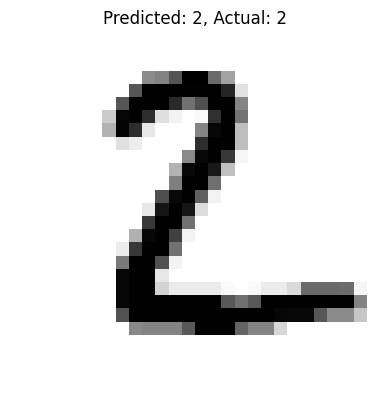

------------------------------------------------------------


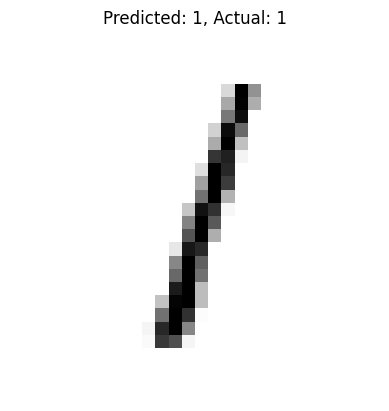

------------------------------------------------------------


In [33]:
for data, pred, actual in zip(new_data, y_pred, actual_data):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)